In [1]:
import numpy as np
import matplotlib.pyplot as plt
import visa
import time
import datetime as dt
import importlib.util
spec = importlib.util.spec_from_file_location("FS740", "drivers/FS740.py")
FS740 = importlib.util.module_from_spec(spec)
spec.loader.exec_module(FS740)

In [2]:
rm = visa.ResourceManager()
clock_addr = 'COM4'
protocol = 'RS232'

In [3]:
def chunks(l,n):
    lst = []
    for i in range(0, len(l), n):
        lst.append(l[i:i+n])
    return lst

id | snr | azimuth | elevation
32 |  30 |     334 |        69
10 |  23 |     168 |        61
14 |  27 |     302 |        54
25 |  43 |     111 |        45
31 |  33 |     231 |        34
18 |  22 |     285 |        21
signal : 29.7


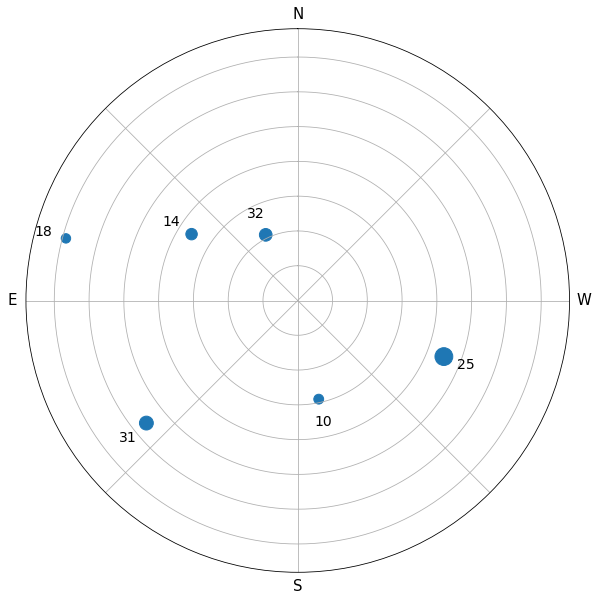

In [4]:
remap_radial = lambda r: 90 - r
with FS740.FS740(rm, clock_addr, protocol) as clock:
    response = clock.GPSSatelliteTrackingStatus()

vals = chunks(response.split(','),8)
    
ids, signal, elevation, azimuth = zip(*[(int(val[0]), int(val[4]), int(val[5]), int(val[6])) for val in vals if (val[3] =='0') and (val[0] != '0')])
    
fig, ax = plt.subplots(figsize = (10,10), subplot_kw = {'projection': 'polar'})

ax.set_rmax(90)
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")
sc = ax.scatter(np.array(azimuth)*np.pi/180, list(map(remap_radial, elevation)), np.array(signal)**1.9/4
                )

ax.set_xticklabels(['N', '', 'W', '', 'S', '', 'E', ''], fontsize = 15)
ax.set_yticklabels([])
[ax.annotate(str(idS), xy = (azi*np.pi/180, remap_radial(ele)+6.7),
            verticalalignment = 'center', horizontalalignment = 'center', 
            fontsize = 14) for idS, azi, ele in zip(ids, azimuth, elevation)]

header = 'id | snr | azimuth | elevation'
print(header)
print('='*len(header))
for idS, sig, azi, ele in zip(ids, signal, azimuth, elevation):
    print('{0:2d} | {1:3d} | {2:7d} | {3:9d}'.format(idS, sig, azi, ele))
print('='*len(header))
print('signal : {0}'.format(round(sum(signal)/len(signal),1)))

In [5]:
# %%time
with FS740.FS740(rm, clock_addr, protocol) as clock:
    response = clock.GPSSatelliteTrackingStatus()
chunks(response.split(','),8)

[['32', '1', '1', '0', '30', '69', '334', '0'],
 ['10', '1', '1', '0', '23', '61', '168', '0'],
 ['14', '1', '1', '0', '27', '54', '302', '0'],
 ['25', '1', '1', '0', '43', '45', '111', '0'],
 ['31', '1', '1', '0', '32', '34', '231', '0'],
 ['18', '1', '1', '0', '22', '21', '285', '0'],
 ['12', '0', '0', '1', '0', '34', '66', '0'],
 ['20', '0', '0', '1', '0', '31', '159', '0'],
 ['1', '0', '0', '1', '0', '14', '315', '0'],
 ['24', '0', '0', '1', '0', '9', '54', '0'],
 ['22', '0', '0', '1', '0', '7', '317', '0'],
 ['11', '0', '0', '1', '0', '3', '297', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0']]

In [6]:
%%time
with FS740.FS740(rm, clock_addr, protocol) as clock:
    print("IDN : ",clock.ReadIDN())
    print("TIME : ",clock.ReadSystemDate(), clock.ReadSystemTime())
    print("TIME ALI : ",clock.ReadGPSConfigAlignment())
    print("STATE : ",clock.TBaseState())
    print("HOLD DUR : ",clock.TBaseStateHoldoverDuration())
    print("WARM DUR : ",clock.TBaseStateWarumpDuration())
    print("LOCK DUR : ",clock.TBaseStateLockDuration()) 
    print("FCONTROL : ",clock.ReadTBaseFControl())
    print("HMODE : ",clock.ReadTBaseConfigHMode())
    print("BWIDTH : ",clock.ReadTBaseConfigBWidth())
    print("LOCK : ",clock.ReadTBaseConfigLock())
    print("TINT LIM : ",clock.ReadTBaseConfigTIntervalLimit())
    print("TINT : ",clock.TBaseTInterval())
    print("TCON CUR : ",clock.ReadTBaseTConstant())
    print("TCON TAR : ",clock.ReadTBaseTConstant("TARG"))
    print("GPS POS : ",clock.GPSPosition())
    print("GPS TRACK : ",clock.GPSSatelliteTracking())
    print("GPS TRACK STAT : ",clock.GPSSatelliteTrackingStatus())
    print("GPS MODE : ",clock.ReadGPSConfigMode())
    print("GPS QUAL : ",clock.ReadGPSConfigQuality())
    print("GPS ADELAY : ",clock.ReadGPSConfigADelay())

IDN :  Stanford Research Systems,FS740,s/n001165,ver3.06.11
TIME :  2019,1,8 17,35,5.686619715596
TIME ALI :  UTC
STATE :  LOCK
HOLD DUR :  0
WARM DUR :  134
LOCK DUR :  9401
FCONTROL :  1.788443E+00
HMODE :  WAIT
BWIDTH :  AUT
LOCK :  1
TINT LIM :  1.00000000000000E-06
TINT :  2.54014129678002E-08
TCON CUR :  2000
TCON TAR :  2000
GPS POS :  7.21118709649356315E-01,-1.27274096067011944E+00,1.32376295748067774E+00
GPS TRACK :  12,32,10,14,25,31,18,12,20,1,24,22,11
GPS TRACK STAT :  32,1,1,0,30,69,334,0,10,1,1,0,21,61,168,0,14,1,1,0,26,54,302,0,25,1,1,0,43,45,111,0,31,1,1,0,32,34,231,0,18,1,1,0,23,21,285,0,12,0,0,1,0,34,66,0,20,0,0,1,0,31,159,0,1,0,0,1,0,14,315,0,24,0,0,1,0,9,54,0,22,0,0,1,0,7,317,0,11,0,0,1,0,3,297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GPS MODE :  1,0.00000000E+00,0.00000000E+00
GPS QUAL :  3SAT
GPS ADELAY :  -3.54590000000000001E-08
Wall time: 576 ms
